# Week 01: Regex

In [26]:
# NOTE: Things to take into account
# Check your regex in regex101.com

# NOTE: re.findall() returns all non-overlapping occurrences of the pattern 
# in the input string as a list of strings (or tuples of strings if there are 
# capturing groups), and it continues searching for all matches throughout the entire string


In [27]:
test1 = "Oscar Guarnizo"
test2 = "username102012"
test3 = "aababaa aabaa bab abaaaba"
test4 = "In Brum people say bab"
test5 = "Hola soyab b Oscarb Oscarb 788851 perrob perrob TT45$%$^ abe67b"

In [28]:
import re
strings = [test1, test2, test3, test4, test5]

def match_exp(strings, expression, all_find = True):
    for item in strings:
        print(item)
        if not all_find:
            print(re.search(expression, item))
        else:
            print(re.findall(expression, item))


## Question 1:

Write regular expressions for the following languages.

**1. The set of all alphabetic strings**

In [29]:
pattern = r"[A-Za-z]" # chars in general
match_exp(strings, pattern)

Oscar Guarnizo
['O', 's', 'c', 'a', 'r', 'G', 'u', 'a', 'r', 'n', 'i', 'z', 'o']
username102012
['u', 's', 'e', 'r', 'n', 'a', 'm', 'e']
aababaa aabaa bab abaaaba
['a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'a']
In Brum people say bab
['I', 'n', 'B', 'r', 'u', 'm', 'p', 'e', 'o', 'p', 'l', 'e', 's', 'a', 'y', 'b', 'a', 'b']
Hola soyab b Oscarb Oscarb 788851 perrob perrob TT45$%$^ abe67b
['H', 'o', 'l', 'a', 's', 'o', 'y', 'a', 'b', 'b', 'O', 's', 'c', 'a', 'r', 'b', 'O', 's', 'c', 'a', 'r', 'b', 'p', 'e', 'r', 'r', 'o', 'b', 'p', 'e', 'r', 'r', 'o', 'b', 'T', 'T', 'a', 'b', 'e', 'b']


In [30]:
pattern = r"\b[A-Za-z]+\b" # only words
match_exp(strings, pattern)

Oscar Guarnizo
['Oscar', 'Guarnizo']
username102012
[]
aababaa aabaa bab abaaaba
['aababaa', 'aabaa', 'bab', 'abaaaba']
In Brum people say bab
['In', 'Brum', 'people', 'say', 'bab']
Hola soyab b Oscarb Oscarb 788851 perrob perrob TT45$%$^ abe67b
['Hola', 'soyab', 'b', 'Oscarb', 'Oscarb', 'perrob', 'perrob']


**2. The set of all lowercase alphabetic strings ending in a b.**

In [31]:
# NOTE: I don't know if I have to use + or *
pattern = r"\b[a-z]*[b$]\b" # only words
match_exp(strings, pattern)

Oscar Guarnizo
[]
username102012
[]
aababaa aabaa bab abaaaba
['bab']
In Brum people say bab
['bab']
Hola soyab b Oscarb Oscarb 788851 perrob perrob TT45$%$^ abe67b
['soyab', 'b', 'perrob', 'perrob']


**3. The set of all strings from the alphabet a,b such that each a is immediately preceded and followed by a b. bab**

In [32]:
pattern = r"[ab]*bab[ab]*"
match_exp(strings, pattern)

Oscar Guarnizo
[]
username102012
[]
aababaa aabaa bab abaaaba
['aababaa', 'bab']
In Brum people say bab
['bab']
Hola soyab b Oscarb Oscarb 788851 perrob perrob TT45$%$^ abe67b
[]


## QUESTION 2
Write regular expressions for the following languages. By “word”, we mean an 
alphabetic string separated from other words by whitespace, any relevant punctuation,
line breaks, and so forth.

**1. The set of all strings with two consecutive repeated words (e.g., “Humbert
Humbert” and “the the” but not “the bug” or “the big bug”). You may use \s
to match a whitespace character to make things clear**

In [33]:
pattern = r"\b([A-Za-z]+)\s\1\b" 
match_exp(strings, pattern)

Oscar Guarnizo
[]
username102012
[]
aababaa aabaa bab abaaaba
[]
In Brum people say bab
[]
Hola soyab b Oscarb Oscarb 788851 perrob perrob TT45$%$^ abe67b
['Oscarb', 'perrob']


**2. All strings that start at the beginning of the line with an integer and that end
at the end of the line with a word. You may use \b to match the empty string,
but only when it is not at the beginning or end of a word.**



In [36]:
# NOTE: the thing is here I'm trying to find all the matching in a string 
# I think that the problem require me to only check in separate string

pattern = r"\b[0-9]+\b.*\b[A-Za-z]+\b"
match_exp(strings, pattern)

Oscar Guarnizo
[]
username102012
[]
aababaa aabaa bab abaaaba
[]
In Brum people say bab
[]
Hola soyab b Oscarb Oscarb 788851 perrob perrob TT45$%$^ abe67b
['788851 perrob perrob']


**3. All strings that have both the word grotto and the word raven in them (but
not, e.g., words like grottos that merely contain the word grotto).**

In [37]:
pattern = r'.*\bgrotto\b.*\braven\b.*|.*\braven\b.*\bgrotto\b.*'
match_exp(strings, pattern)

Oscar Guarnizo
[]
username102012
[]
aababaa aabaa bab abaaaba
[]
In Brum people say bab
[]
Hola soyab b Oscarb Oscarb 788851 perrob perrob TT45$%$^ abe67b
[]


In [38]:
corpus = "Hola soy Oscar, grotto es una palabra y raven tambien"
matched = re.match(pattern, corpus)
print("Q2.3", corpus, True if matched else False)

corpus = "Hola soy Oscar, raven es una palabra y grotto tambien"
matched = re.match(pattern, corpus)
print("Q2.3", corpus, True if matched else False)

corpus = "Hola soy Oscar, grotto es una palabra"
matched = re.match(pattern, corpus)
print("Q2.3", corpus, True if matched else False)

corpus = "Hola soy Oscar, raven es una palabra"
matched = re.match(pattern, corpus)
print("Q2.3", corpus, True if matched else False)

corpus = "Hola soy Oscar, grottos no esta permitido una palabra y raven tambien"
matched = re.match(pattern, corpus)
print("Q2.3", corpus, True if matched else False)

Q2.3 Hola soy Oscar, grotto es una palabra y raven tambien True
Q2.3 Hola soy Oscar, raven es una palabra y grotto tambien True
Q2.3 Hola soy Oscar, grotto es una palabra False
Q2.3 Hola soy Oscar, raven es una palabra False
Q2.3 Hola soy Oscar, grottos no esta permitido una palabra y raven tambien False


**4. Write a pattern that places the first word of an English sentence in a register.
Elegantly deal with punctuation**

In [ ]:
pattern = r'^([A-Za-z]+)\b.*'
corpus = "Hola soy Oscar, grottos no esta permitido una palabra y raven tambien"
matched = re.match(pattern, corpus)
print("Q2.4", corpus, True if matched else False)
if matched:
    first_word = matched.group(1)
    print("First Register:", first_word)
else:
    print("No match found.")

## QUESTION 3

Implement an ELIZA-like program, using substitutions such as those described on
page 10. You might want to choose a different domain than a Rogerian psychologist,
although keep in mind that you would need a domain in which your program can
legitimately engage in a lot of simple repetition.

![WhatsApp Image 2024-01-22 at 15.06.08_43c21ca8.jpg](<attachment:WhatsApp Image 2024-01-22 at 15.06.08_43c21ca8.jpg>)
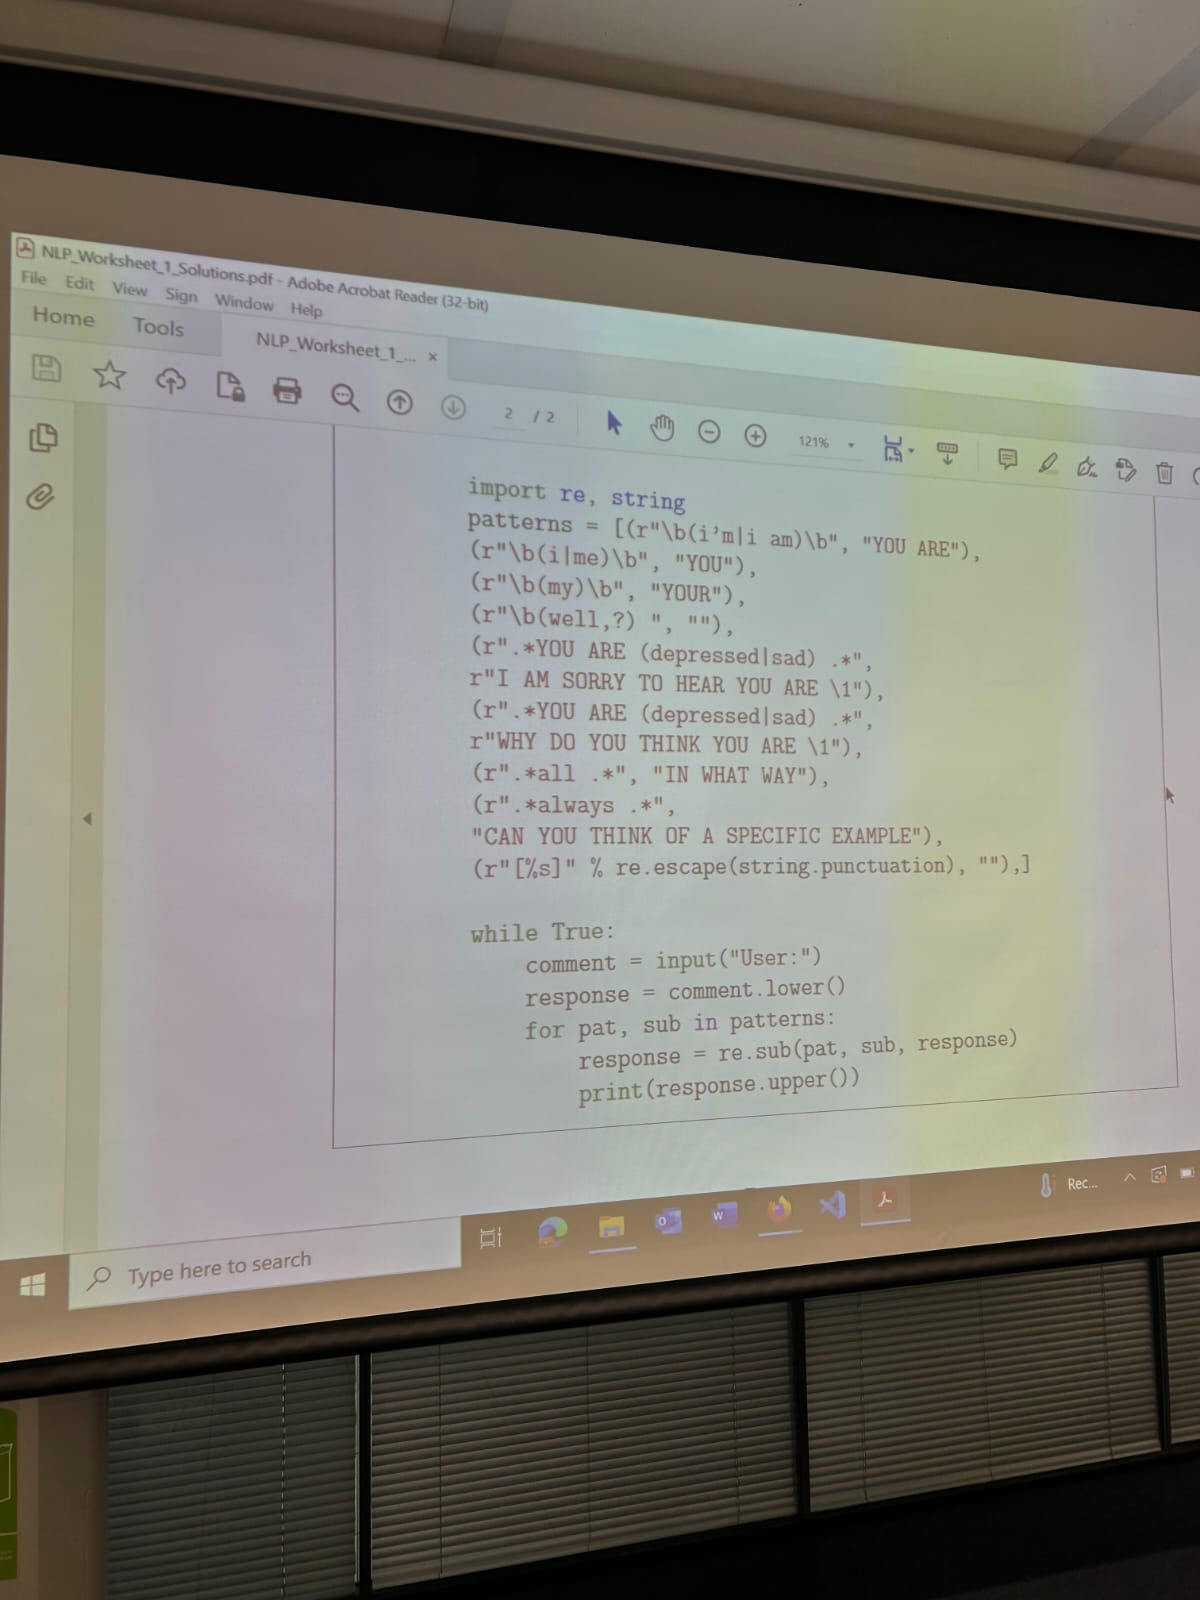

In [ ]:
# TODO: But by understanding the substitution is enough